<a href="https://colab.research.google.com/github/ctalamilla/random_forest_UDA/blob/main/Random_Forest_cl_rf_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

# **Clasificación**

# **Bosques Aleatorios**

**Los Bosques Aleatorios están formados por un conjunto de árboles de decisión individuales, cada uno de ellos entrenados con una muestra distinta del conjunto de datos de entrenamiento, es decir un subconjunto aleatorio del conjunto de datos de entrenamiento para cada arbol que forma el bosque.**

**La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.**

**Los modelos basados en árboles de decisión se han convertido en referentes dentro del ámbito predictivo debido a los buenos resultados que generan en problemas muy diversos. Dado que el elemento fundamental de un Random Forest son los árboles de decisión, es importante entender cómo funcionan estos últimos.**

## **Actualizando los módulos necesarios**

In [ ]:
!pip install scikit-learn --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Carga de librerías necesarias**

### **Para análisis de datos**

In [1]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import numpy as np

### **Para el desarrollo del modelo**

In [2]:
import sklearn #para los algoritmos de aprendizaje automático
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics #para la medición de los algoritmos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

### **Para graficos**

In [3]:
import matplotlib.pyplot as plt #librería gráfica básica


## **Ingeniería de las características de los Datos**

### **Extracción de Datos - Creación del DataFrame**

In [4]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"

In [5]:
archivo = "Clientes.csv"

In [10]:
clientes = pd.read_csv(url+archivo) #los datos están separados por comas
clientes #vista del dataframe

,ID,Trabajo,Edad,Salario,Compra
0,15624510,1,19,19000,No
1,15810944,1,35,20000,No
2,15668575,0,26,43000,No
3,15603246,0,27,57000,No
4,15804002,1,19,76000,No
...,...,...,...,...,...
395,15691863,0,46,41000,Si
396,15706071,1,51,23000,Si
397,15654296,0,50,20000,Si
398,15755018,1,36,33000,No


**El dataframe contiene 5 variables y 400 observaciones.**

**Las variables indican:**
- **ID:** La identificación del cliente
- **Trabajo:** Corresponde 1 cuando es Dependiente y 0 cuando es Independiente
- **Edad:** La edad del cliente
- **Salario:** El salario estimado del cliente
- **Compra:** Si, cuando el cliente ha comprado y no cuando no lo ha hecho.

**El problema a resolver es con los datos historicos (entrenamiento) predecir en virtud de las variables independientes, si un cliente va a efectuar una compra.**

### **Selección de características**

In [ ]:
clientes.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       400 non-null    int64 
 1   Trabajo  400 non-null    int64 
 2   Edad     400 non-null    int64 
 3   Salario  400 non-null    int64 
 4   Compra   400 non-null    object
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...**

In [11]:
clientes.drop_duplicates(inplace=True)
clientes.shape

(400, 5)

**Ahora vamos a eliminar la variable o columna que no es pertinente para el problema planteado...**

In [12]:
clientes = clientes.drop(columns=["ID"]) #se elimina la variable no relevante
clientes #vista del dataframe

,Trabajo,Edad,Salario,Compra
0,1,19,19000,No
1,1,35,20000,No
2,0,26,43000,No
3,0,27,57000,No
4,1,19,76000,No
...,...,...,...,...
395,0,46,41000,Si
396,1,51,23000,Si
397,0,50,20000,Si
398,1,36,33000,No


## **Codificación**

In [13]:
clientes = pd.get_dummies(clientes, columns= ["Trabajo"]) #one-hot encoding

In [14]:
clientes

,Edad,Salario,Compra,Trabajo_0,Trabajo_1
0,19,19000,No,0,1
1,35,20000,No,0,1
2,26,43000,No,1,0
3,27,57000,No,1,0
4,19,76000,No,0,1
...,...,...,...,...,...
395,46,41000,Si,1,0
396,51,23000,Si,0,1
397,50,20000,Si,1,0
398,36,33000,No,0,1


## **Identificación de variables predictoras y variable objetivo**

In [15]:
y = clientes["Compra"] #se define la variable objetivo
X = clientes.drop(columns=["Compra"]) #se elimina la variable objetivo del vector de entrada

In [16]:
y #visualizando la variable objetivo

0      No
1      No
2      No
3      No
4      No
       ..
395    Si
396    Si
397    Si
398    No
399    Si
Name: Compra, Length: 400, dtype: object

In [ ]:
X #visualizando el vector de entrada

,Edad,Salario,Trabajo_0,Trabajo_1
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


# **Creación y evaluación del Algoritmo**

## **Bosque Aleatorio**

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 10, bootstrap = True, oob_score = True, random_state = 0)

In [ ]:
model_rf.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=0)

### **Predicción y evaluación con oob method**

In [ ]:
prediccion = model_rf.oob_decision_function_
prediccion

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.66666667, 0.33333333],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.125     , 0.875     ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.

In [ ]:
model_rf.oob_score_

0.87

El número de predicciones correctas sobre la muestra fuera de la bolsa (oob). Accuracy.

### **Predicción y evaluación con validación cruzada**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train.shape

(300, 4)

In [ ]:
X_test.shape

(100, 4)

In [ ]:
y_train.shape

(300,)

In [ ]:
y_test.shape

(100,)

In [ ]:
model2_rf = RandomForestClassifier(n_estimators = 10, random_state = 0)
model2_rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
prob = model2_rf.predict_proba(X_test)
prob

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.3, 0.7],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.9, 0.1],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.5, 0.5],
       [1. , 0. ],
       [0.8, 0.2],
       [0.3, 0.7],
       [1. , 0. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. ,

In [ ]:
y_pred_rf = model2_rf.predict(X_test)
y_pred_rf

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'Si', 'No',
       'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No', 'No', 'Si',
       'No', 'Si', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'No', 'Si',
       'No', 'No', 'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Si', 'No', 'Si', 'Si', 'No', 'No', 'Si', 'Si',
       'Si', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No', 'Si', 'No', 'Si',
       'No', 'No', 'No', 'No', 'Si', 'No', 'No', 'Si', 'No', 'No', 'No',
       'No', 'Si', 'Si', 'Si', 'Si', 'No', 'No', 'Si', 'No', 'No', 'Si',
       'Si', 'No', 'No', 'Si', 'No', 'No', 'No', 'No', 'No', 'Si', 'Si',
       'Si'], dtype=object)

In [ ]:
cuadro = pd.DataFrame()
cuadro["Real"] = y_test
cuadro["Predicción"] = y_pred_rf
cuadro

,Real,Predicción
132,No,No
309,No,No
341,No,No
196,No,No
246,No,No
...,...,...
146,Si,No
135,No,No
390,Si,Si
264,Si,Si


In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_rf)
print(mc)

[[64  4]
 [ 4 28]]


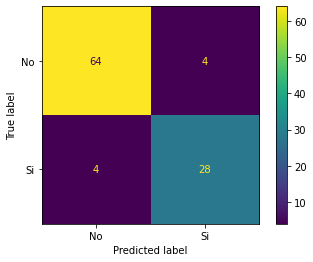

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=model2_rf.classes_)
disp.plot();

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_rf)
print(reporte)

              precision    recall  f1-score   support

          No       0.94      0.94      0.94        68
          Si       0.88      0.88      0.88        32

    accuracy                           0.92       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [ ]:
metrics.accuracy_score(y_test, y_pred_rf)

0.92

La accuracy del modelo es mejor con la validación cruzada.